In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [2]:
# Откроем данные
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [4]:
data.duplicated().sum()

0

Пропусков и дубликатов нет.  

In [5]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


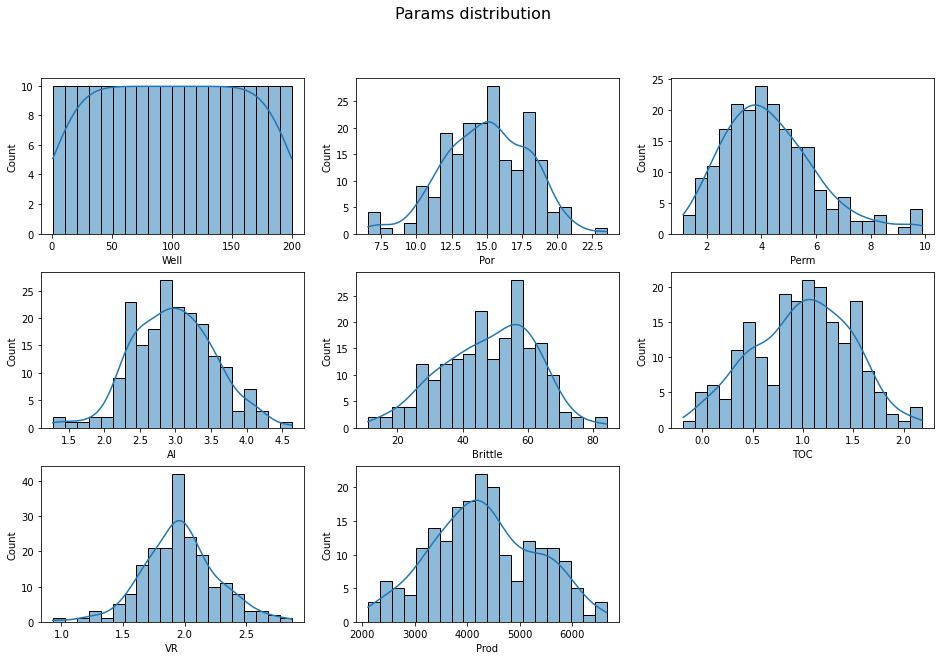

In [6]:
# Строим гистограммы распределения признаков
# с ядерной оценкой плотности
fig, axes = plt.subplots(3, 3, figsize=(16, 10))
plt.subplots_adjust(wspace=0.2, hspace=0.25)
fig.suptitle('Params distribution', fontsize=16)
axes = axes.flatten()
cols = list(data.columns)
if axes.shape[0] > len(cols):
    ax_del = axes.shape[0] - len(cols)
    for i in range(ax_del):
        fig.delaxes(axes[axes.shape[0] - i - 1])
for i, col in enumerate(cols):
    hist = sns.histplot(
        data=data,
        x=col,
        bins=20,
        kde=True,
        ax=axes[i]
    );

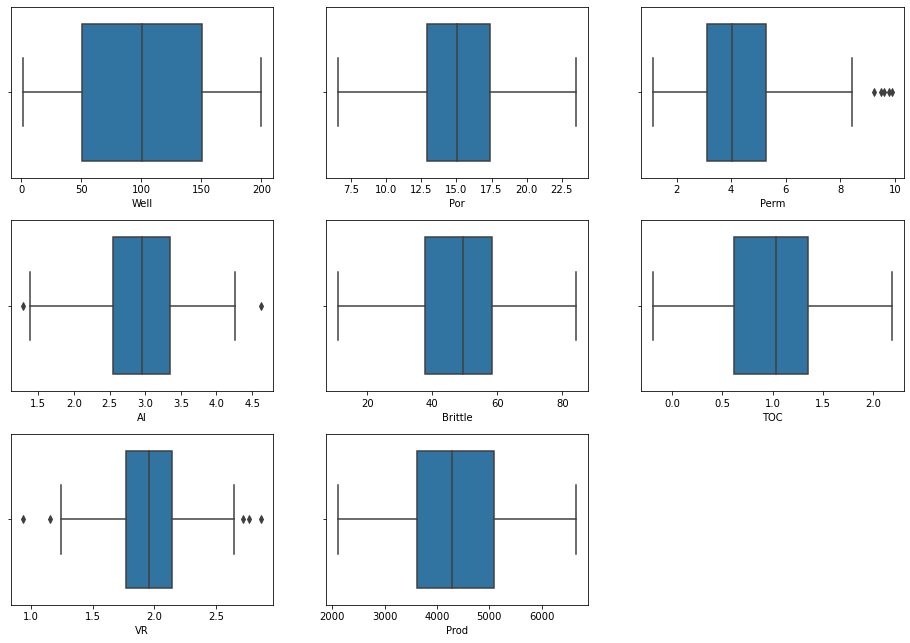

In [7]:
# Строим ящики с усами
fig, axes = plt.subplots(3, 3, figsize=(16, 11))
plt.subplots_adjust(wspace=0.2, hspace=0.25)
axes = axes.flatten()
cols = list(data.columns)
if axes.shape[0] > len(cols):
    ax_del = axes.shape[0] - len(cols)
    for i in range(ax_del):
        fig.delaxes(axes[axes.shape[0] - i - 1])
for i, col in enumerate(cols):
    sns.boxplot(
        x=data[col],  
        orient='h',
        width=0.8,
        ax=axes[i]
    )

Параметр `Well` - идентификатор скважины, имеет равномерное распределение и не несет смысла.  
Распределения остальных параметров напоминают нормальные, некоторые несколько смещены вправо (`Perm`) и влево (`Brittle`, `Toc`).  
По боксплотам у переменных `Perm`, `AI`, `VR` видны выбросы.

## Задание 2.1

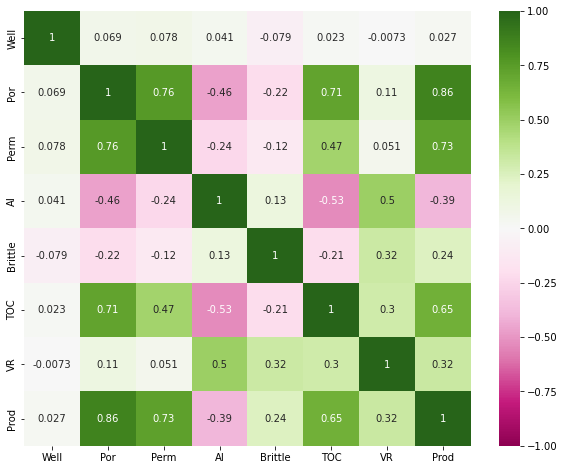

In [8]:
# Постройте корреляционную матрицу факторов, 
# включив в неё целевой признак.
corr_ar = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr_ar,
    cmap='PiYG', 
    annot=True,
    vmin=-1,
    vmax=1
);

In [9]:
# Вычислите ранг полученной матрицы корреляций
np.linalg.matrix_rank(corr_ar)

8

In [10]:
# Вычислите определитель матрицы корреляций
np.linalg.det(corr_ar)

0.0007299388072652082

## Задание 2.2

In [11]:
# Создайте матрицу наблюдений. Обозначьте её за X, 
# а вектор правильных ответов — за y .
X = np.column_stack((
    np.ones(data.shape[0]), 
    data.iloc[:, 0:7]
))
y = np.array(data.iloc[:, 7])

In [12]:
# Постройте модель линейной регрессии по методу наименьших квадратов. 
# Для этого используйте матричную формулу NumPy. 
# В качестве ответа укажите полученные оценки коэффициентов модели
w_hat = np.linalg.inv(X.T@X) @ X.T@y
display(pd.DataFrame(
    data=w_hat, 
    index=['intercept', 'Well', 'Por', 'Perm', 
           'AI', 'Brittle', 'TOC', 'VR'],
    columns=['OLS coeff']
).T)

,intercept,Well,Por,Perm,AI,Brittle,TOC,VR
OLS coeff,-1232.30803,0.0507,230.17914,116.239006,-365.202301,24.99437,-78.400929,785.259815


## Задание 2.3

In [13]:
# Постройте прогноз выработки газа для скважины с параметрами, 
# указанными ниже.
# Чему равна абсолютная ошибка построенного вами прогноза для 
# предложенной скважины ?(в миллионах кубических футов в день).

# Инициализация нового наблюдения и целевого признака
new = np.array([1, 106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
y_new = 4748.315024

# Предсказываем значение модели по новому наблюдению
y_pred = new @ w_hat
print('Абсолютная ошибка:', abs(y_new - y_pred))

Абсолютная ошибка: 25.250970292806414


Метрика MAPE:

![](https://miro.medium.com/max/596/1*vmIM1jePXsDxPpgWEQ35Lg.png)

In [14]:
# Постройте прогноз выработки газа для всех скважин
# из обучающего набора данных. 
# Чему равно значение метрики MAPE вашей модели? 

# Предсказываем значение модели по полученным ранее коэффициентам
y_pred = X @ w_hat

# Вычисляем ошибку по формуле
MAPE = 1/X.shape[0] * sum(abs(y-y_pred) / y) * 100
print(f'MAPE: {MAPE:.2} %')

MAPE: 3.6 %


## Задание 2.5

In [15]:
# Исключите из данных сильно коррелированные между собой факторы.

# Данные после исключения коррелированных факторов
X_new = np.column_stack((
    np.ones(data.shape[0]), 
    data.loc[:, ['Por', 'AI', 'Brittle', 'VR']]
))

In [16]:
# Постройте линейную регрессию на обновлённых после удаления 
# факторов данных по методу наименьших квадратов. 
w_hat = np.linalg.inv(X_new.T@X_new) @ X_new.T@y
display(pd.DataFrame(
    data=w_hat, 
    index=['intercept', 'Por', 'AI', 'Brittle', 'VR'],
    columns=['OLS coeff']
).T)

,intercept,Por,AI,Brittle,VR
OLS coeff,-1835.446461,293.036246,-200.030912,27.640982,517.402726


In [17]:
# Сделайте прогноз для всего обучающего набора данных и
# рассчитайте метрику MAPE (Mean Absolute Percentage Error).

# Предсказываем значение модели по полученным коэффициентам
y_pred = X_new @ w_hat

# Вычисляем ошибку с помошью встроенной метрики
MAPE = mean_absolute_percentage_error(y, y_pred) * 100
RMSE = mean_squared_error(y, y_pred, squared=False)
print(f'MAPE: {MAPE:.1f} %')
print(f'RMSE: {RMSE:.1f} млн. куб. футов в сутки')

MAPE: 4.0 %
RMSE: 231.6 млн. куб. футов в сутки


## Задание 3.1

In [18]:
# Сгенерируйте полиномиальные признаки третьего порядка 
# на факторах, которые вы выбрали для обучения моделей

# Матрица наблюдений и вектор целевого признака
X = data.loc[:, ['Por', 'AI', 'Brittle', 'VR']]
y = np.array(data.iloc[:, 7])

# Добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly.shape

(200, 34)

In [19]:
# Обучите модель линейной регрессии из библиотеки 
# sklearn (LinearRegression) на полученных полиномиальных факторах.
lineal_model = LinearRegression().fit(X_poly, y)

In [20]:
# Оцените среднее значение метрики MAPE, 
# используя кросс-валидацию на пяти фолдах.
cv_results = cross_validate(
    lineal_model, 
    X_poly, 
    y, 
    scoring=['neg_mean_absolute_percentage_error',
             'neg_root_mean_squared_error'],
    cv=5, 
    return_train_score=True
)
print('MAPE на тренировочных фолдах: {:.1f} %'.format(
    -cv_results['train_neg_mean_absolute_percentage_error'].mean() * 100
))
print('MAPE на валидационных фолдах: {:.1f} %'.format(
    -cv_results['test_neg_mean_absolute_percentage_error'].mean() * 100
))

# Дополнительно оцениваем RMSE
print('RMSE на тренировочных фолдах: {:.1f} млн. куб. футов в сутки'\
      .format(-cv_results['train_neg_root_mean_squared_error'].mean()))
print('RMSE на валидационных фолдах: {:.1f} млн. куб. футов в сутки'\
      .format(-cv_results['test_neg_root_mean_squared_error'].mean()))

MAPE на тренировочных фолдах: 1.8 %
MAPE на валидационных фолдах: 2.7 %
RMSE на тренировочных фолдах: 100.7 млн. куб. футов в сутки
RMSE на валидационных фолдах: 154.5 млн. куб. футов в сутки


## Задание 3.2

In [21]:
# Обучите модель Lasso из библиотеки sklearn на полученных 
# полиномиальных факторах, предварительно стандартизировав факторы 
# с помощью StandardScaler. 
# Коэффициент регуляризации выставите равным 5.

# Стандартизируем факторы
X_st = StandardScaler().fit_transform(X)

# Добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_st)

# Создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=5)

# Оцените среднее значение метрики MAPE, 
# используя кросс-валидацию на пяти фолдах.
cv_results = cross_validate(
    lasso, 
    X_poly, 
    y, 
    scoring=['neg_mean_absolute_percentage_error',
             'neg_root_mean_squared_error'],
    cv=5, 
    return_train_score=True
)
print('MAPE на тренировочных фолдах: {:.1f} %'.format(
    -cv_results['train_neg_mean_absolute_percentage_error'].mean() * 100
))
print('MAPE на валидационных фолдах: {:.1f} %'.format(
    -cv_results['test_neg_mean_absolute_percentage_error'].mean() * 100
))

# Дополнительно оцениваем RMSE
print('RMSE на тренировочных фолдах: {:.1f} млн. куб. футов в сутки'\
      .format(-cv_results['train_neg_root_mean_squared_error'].mean()))
print('RMSE на валидационных фолдах: {:.1f} млн. куб. футов в сутки'\
      .format(-cv_results['test_neg_root_mean_squared_error'].mean()))

MAPE на тренировочных фолдах: 1.8 %
MAPE на валидационных фолдах: 2.3 %
RMSE на тренировочных фолдах: 106.8 млн. куб. футов в сутки
RMSE на валидационных фолдах: 129.7 млн. куб. футов в сутки


## Задание 3.3

In [22]:
# Обучите модель Ridge из библиотеки sklearn на полученных 
# полиномиальных факторах, предварительно стандартизировав факторы 
# с помощью StandardScaler. 
# Коэффициент регуляризации выставите равным 1.

# Стандартизируем факторы
X_st = StandardScaler().fit_transform(X)

# Добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_st)

# Создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=1)

# Оцените среднее значение метрики MAPE, 
# используя кросс-валидацию на пяти фолдах.
cv_results = cross_validate(
    ridge, 
    X_poly, 
    y, 
    scoring=['neg_mean_absolute_percentage_error',
             'neg_root_mean_squared_error'], 
    cv=5, 
    return_train_score=True
)
print('MAPE на тренировочных фолдах: {:.1f} %'.format(
    -cv_results['train_neg_mean_absolute_percentage_error'].mean() * 100
))
print('MAPE на валидационных фолдах: {:.1f} %'.format(
    -cv_results['test_neg_mean_absolute_percentage_error'].mean() * 100
))

# Дополнительно оцениваем RMSE
print('RMSE на тренировочных фолдах: {:.1f} млн. куб. футов в сутки'\
      .format(-cv_results['train_neg_root_mean_squared_error'].mean()))
print('RMSE на валидационных фолдах: {:.1f} млн. куб. футов в сутки'\
      .format(-cv_results['test_neg_root_mean_squared_error'].mean()))

MAPE на тренировочных фолдах: 1.8 %
MAPE на валидационных фолдах: 2.7 %
RMSE на тренировочных фолдах: 102.5 млн. куб. футов в сутки
RMSE на валидационных фолдах: 153.1 млн. куб. футов в сутки


#### Выводы:
- Изначально определитель матрицы корреляций стремился к 0, матрица была плохо обусловленной. В факторах присутствовала мультиколинеарность, поэтому при построении стандартной МНК-модели интерпретация коэффициентов потеряла смысл (изменились знаки, что сделало нелогичной зависимость).
- После удаления сильно коррелированных между собой признаков и признака который очень слабо коррелировал (и не имел смысловой нагрузки) с целевой переменной устранено противоречие коэффициентов линейной регрессии и коэффициентов корреляции, однако немного увеличился размер ошибки.
- При трансформации признаков в полином 3-ей степени, качество модели несколько улучшилось (уменьшилась ошибка).
- L1-регуляризация показала лучшее качество модели, чем L2-регуляризация.
- Можно было использовать корень из среднеквадратичной ошибки, чтобы интерпретировать ошибку добычи газа в абсолютных значениях млн. кубических футов в сутки.
- Средняя добыча газа по скважине составляет 4200 млн. кубических футов в сутки, поэтому качество модели с лучшей ошибкой после кросс-валидации равной 130 млн. кубических футов в сутки. можно расценить как хорошее.
- Параметр: Идентификатор скважины - не несет смысловой нагрузки, его можно было удалять сразу.
- Можно было попробовать обработать выбросы у переменных.